
```
태양 활동은 약 11년 주기로 극소기와 극대기를 반복한다. 과학자들은 태양 흑점의 변화를 통해 이를 판단하는데, 태양 활동이 워낙 변덕스러워 주기  
변화를 확정하기까지는 보통 몇 개월이 걸린다.흑점이 많아지면 지구의 통신과 전력망, 항공기 운항 시스템, 우주선 등에 장애를 일으킬 수 있기 때문에 
A 연구소는 태양 주기의 변화를 관찰하고 이상 포인트가 예측이 된다면, 이에 대비하여 피해를 최소화하는 연구를 수행하고자 한다.
```  



* 데이터 명세 

|Column|Description|
|:---|:---|
|Months|기준년월|
|SunSpots|흑점개수|





In [2]:
import numpy as np
data = np.loadtxt("chapter30_sunspots.txt", float)
data

array([[0.000e+00, 5.800e+01],
       [1.000e+00, 6.260e+01],
       [2.000e+00, 7.000e+01],
       ...,
       [3.140e+03, 2.520e+01],
       [3.141e+03, 2.350e+01],
       [3.142e+03, 2.160e+01]])

In [3]:
# ▶ pd.set option
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

# ▶ Data read
data = np.loadtxt("chapter30_sunspots.txt", float)
df = pd.DataFrame(data, columns=['Months', 'SunSpots'])
df.head()

,Months,SunSpots
0,0.0,58.0
1,1.0,62.6
2,2.0,70.0
3,3.0,55.7
4,4.0,85.0


### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [4]:
# ▶ Data 형태 확인
# ▶ 3143 row, 2 col로 구성됨
print('df :', df.shape)

df : (3143, 2)


In [5]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Months    3143 non-null   float64
 1   SunSpots  3143 non-null   float64
dtypes: float64(2)
memory usage: 49.2 KB


In [6]:
# ▶ Null 값 확인
print(df.isnull().sum())

Months      0
SunSpots    0
dtype: int64


In [7]:
# ▶ Outlier 확인
df.describe()

,Months,SunSpots
count,3143.000000,3143.000000
mean,1571.000000,51.924499
std,907.450274,44.322387
min,0.000000,0.000000
25%,785.500000,15.450000
50%,1571.000000,41.500000
75%,2356.500000,76.500000
max,3142.000000,253.800000


In [8]:
# ▶ Months col 형 변환
df['Months'] = df['Months'].astype(int)
df.head()

,Months,SunSpots
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0


In [9]:
 # ▶  pd.Timestamp 통해서 시간 데이터 생성
pd.Timestamp('1749-01-01')

Timestamp('1749-01-01 00:00:00')

In [10]:
 # 날짜와 시간을 더할 때 사용 하는 pd.DateOffset 
 df['time_stamp'] = df.apply(lambda x:(pd.Timestamp('1749-01-01') + pd.DateOffset(months = x['Months'])),axis=1)
 df.head()

,Months,SunSpots,time_stamp
0,0,58.0,1749-01-01
1,1,62.6,1749-02-01
2,2,70.0,1749-03-01
3,3,55.7,1749-04-01
4,4,85.0,1749-05-01


In [11]:
df = df.drop(['Months'], axis=1)
df.head()

,SunSpots,time_stamp
0,58.0,1749-01-01
1,62.6,1749-02-01
2,70.0,1749-03-01
3,55.7,1749-04-01
4,85.0,1749-05-01


### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [12]:
 # ▶ Col 위치 변경 
df= df[['time_stamp', 'SunSpots']]
df.head()

,time_stamp,SunSpots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time_stamp  3143 non-null   datetime64[ns]
 1   SunSpots    3143 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.2 KB


In [14]:
# ▶ 데이터 적재 기간 확인 
df['time_stamp'].min(), df['time_stamp'].max()

(Timestamp('1749-01-01 00:00:00'), Timestamp('2010-11-01 00:00:00'))

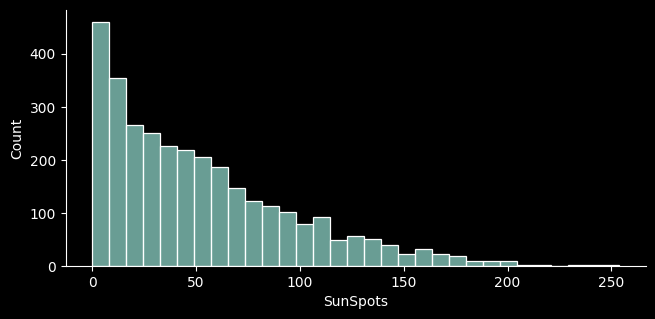

In [15]:
# ▶ SunSpots 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df['SunSpots'])
plt.gcf().set_size_inches(7, 3)

In [16]:
df[df['SunSpots'] == 120].head()

,time_stamp,SunSpots
482,1789-03-01,120.0
485,1789-06-01,120.0
2644,1969-05-01,120.0


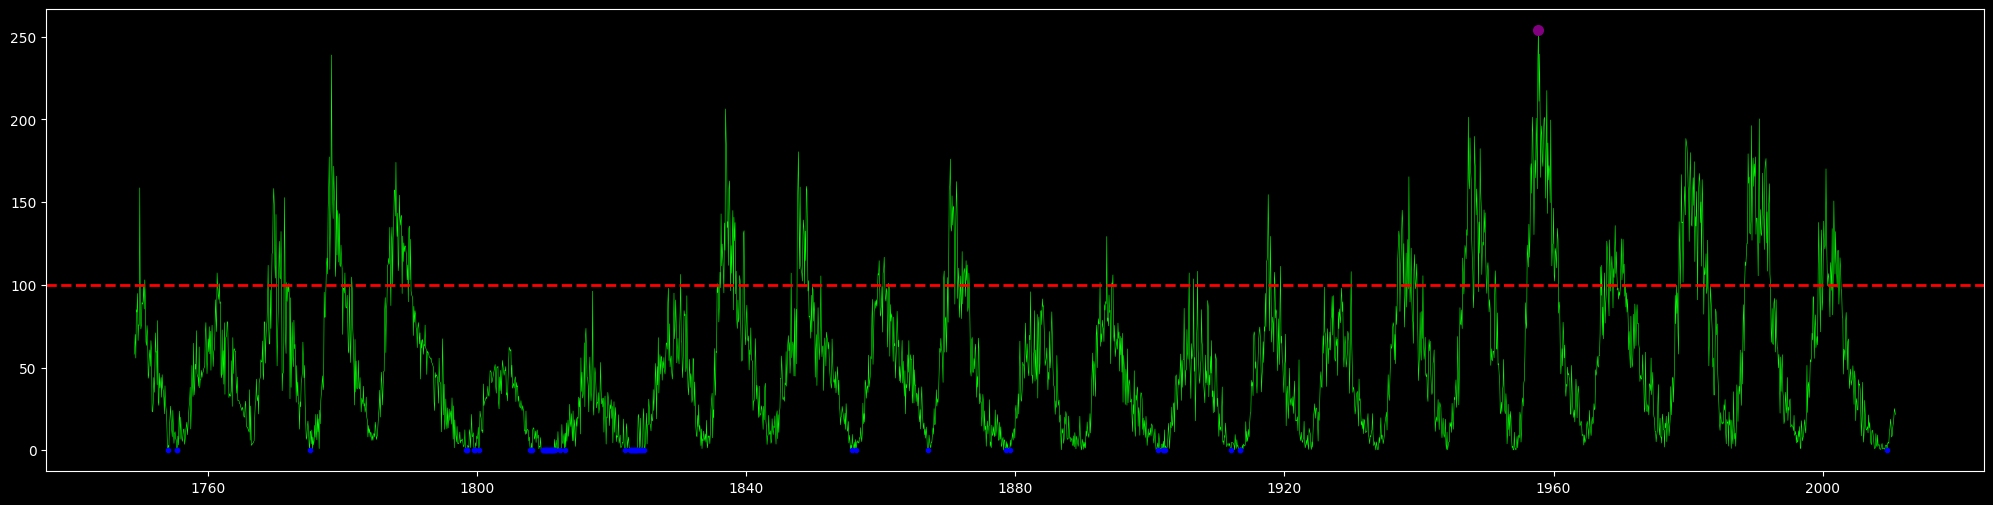

In [17]:
# SunSpots Time-Series Plot
plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='-', linewidth=0.4, color='lime')
plt.plot(df[df['SunSpots'] == 253.8]['time_stamp'],df[df['SunSpots'] == 253.8]['SunSpots'], 'o', color='purple', markersize=7)
plt.plot(df[df['SunSpots'] == 0]['time_stamp'],df[df['SunSpots'] == 0]['SunSpots'], 'o', color='blue', markersize=3)

plt.axhline(100, 0, 1, color='red', linestyle='--', linewidth=2)
# 100이 넘는 부분 시각화
plt.gcf().set_size_inches(25, 6)

### · 주기(Cycle 확인) - 기간
---

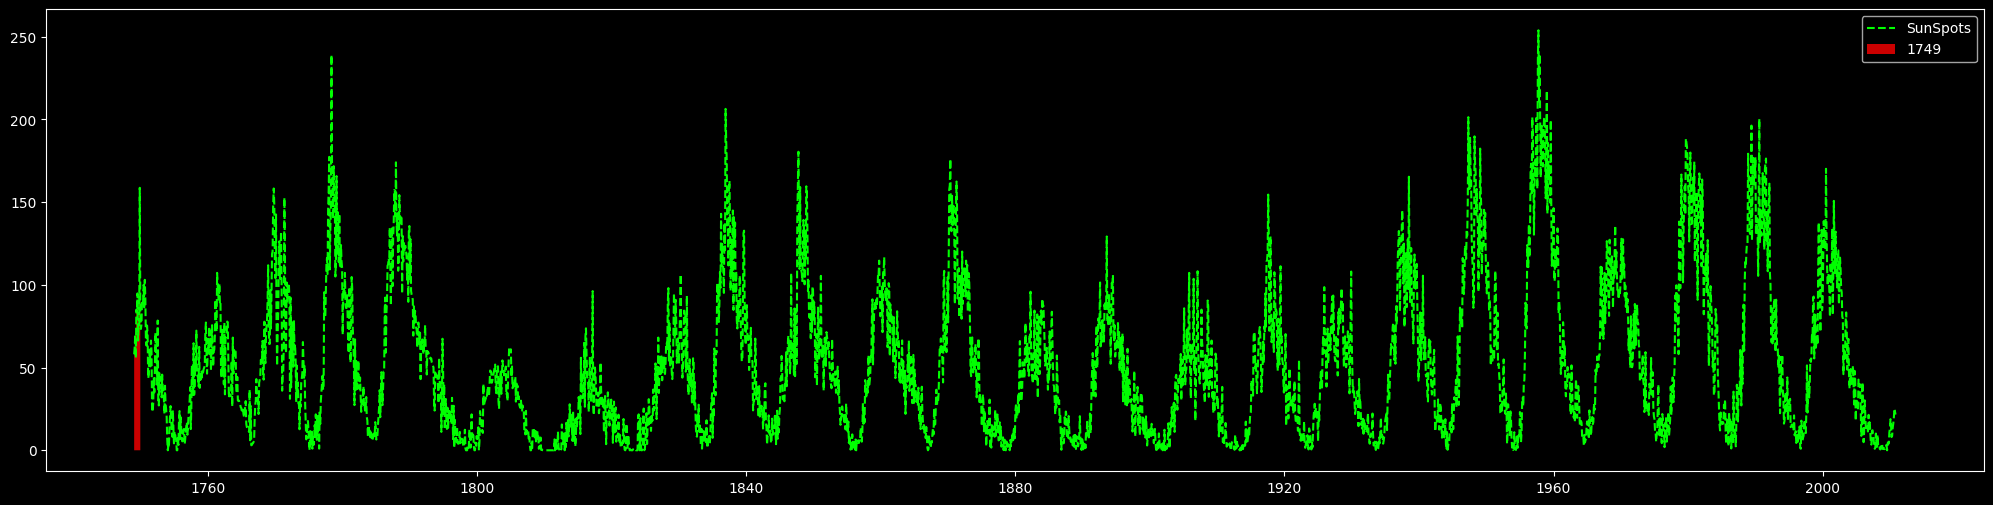

In [18]:
# ▶ str.contains 활용 특정 조건 해당하는 데이터 조회 
plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='--', color='lime')
plt.fill_between(df[df['time_stamp'].astype(str).str.contains('1749')]['time_stamp'], df[df['time_stamp'].astype(str).str.contains('1749')]['SunSpots'], facecolor='red',alpha=0.8,label='1749');
plt.legend();
plt.gcf().set_size_inches(25, 6)

In [19]:
# ▶ 특정 조건에 맞는 데이터의 group id 부여
df['gp'] = np.where((df['time_stamp'] >= '1749-01-01') & (df['time_stamp'] <= '1759-01-01'), 1, 0)
df.head()

,time_stamp,SunSpots,gp
0,1749-01-01,58.0,1
1,1749-02-01,62.6,1
2,1749-03-01,70.0,1
3,1749-04-01,55.7,1
4,1749-05-01,85.0,1


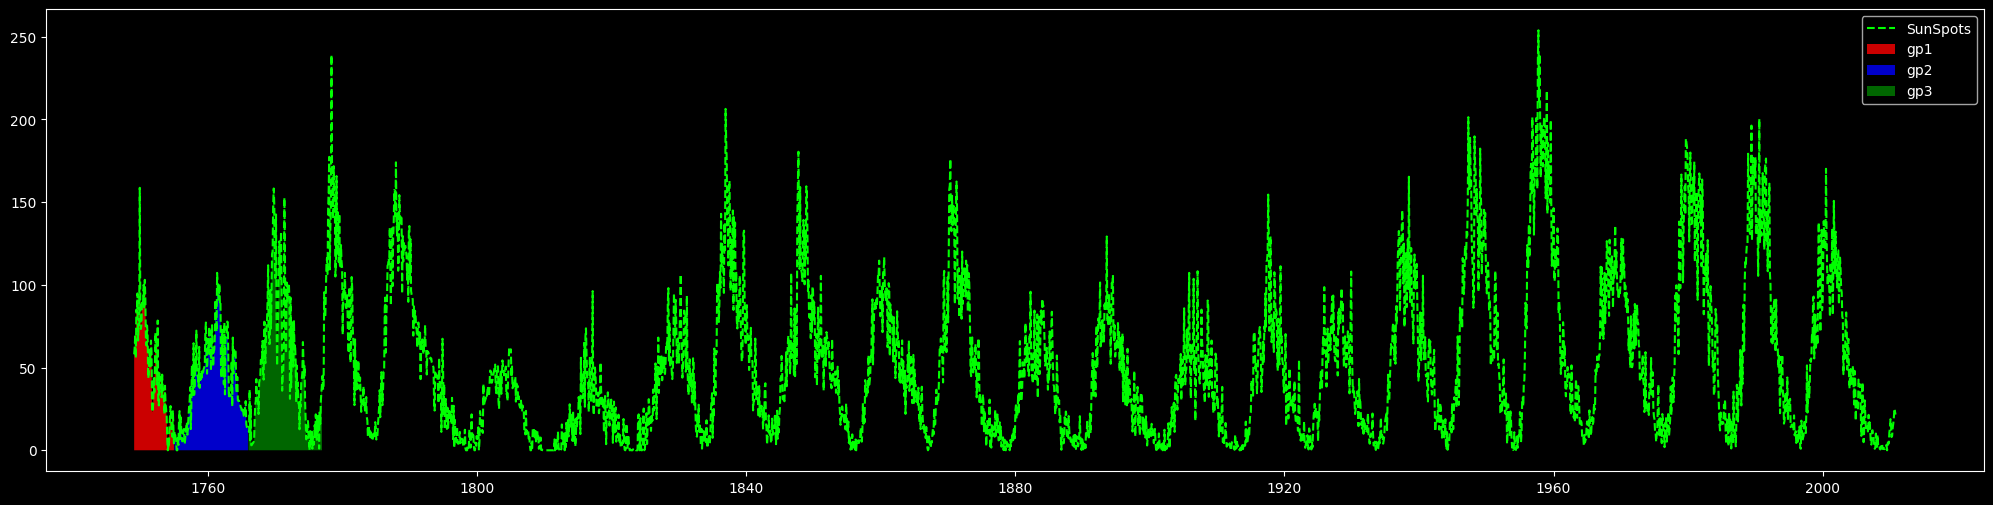

In [20]:
# ▶ 5년
df['gp'] = np.where((df['time_stamp'] >= '1749-01-01') & (df['time_stamp'] <= '1754-12-31'), 1, 0)

# ▶ 10년 주기
df['gp'] = np.where((df['time_stamp'] >= '1755-01-01') & (df['time_stamp'] <= '1765-12-31'), 2, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1766-01-01') & (df['time_stamp'] <= '1776-12-31'), 3, df['gp'])

plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='--', color='lime')
plt.fill_between(df[df['gp']== 1]['time_stamp'], df[df['gp']== 1]['SunSpots'], facecolor='r',alpha=0.8,label='gp1');
plt.fill_between(df[df['gp']== 2]['time_stamp'], df[df['gp']== 2]['SunSpots'], facecolor='b',alpha=0.8,label='gp2');
plt.fill_between(df[df['gp']== 3]['time_stamp'], df[df['gp']== 3]['SunSpots'], facecolor='g',alpha=0.8,label='gp3');
plt.legend();
plt.gcf().set_size_inches(25, 6)

10년 주기..?

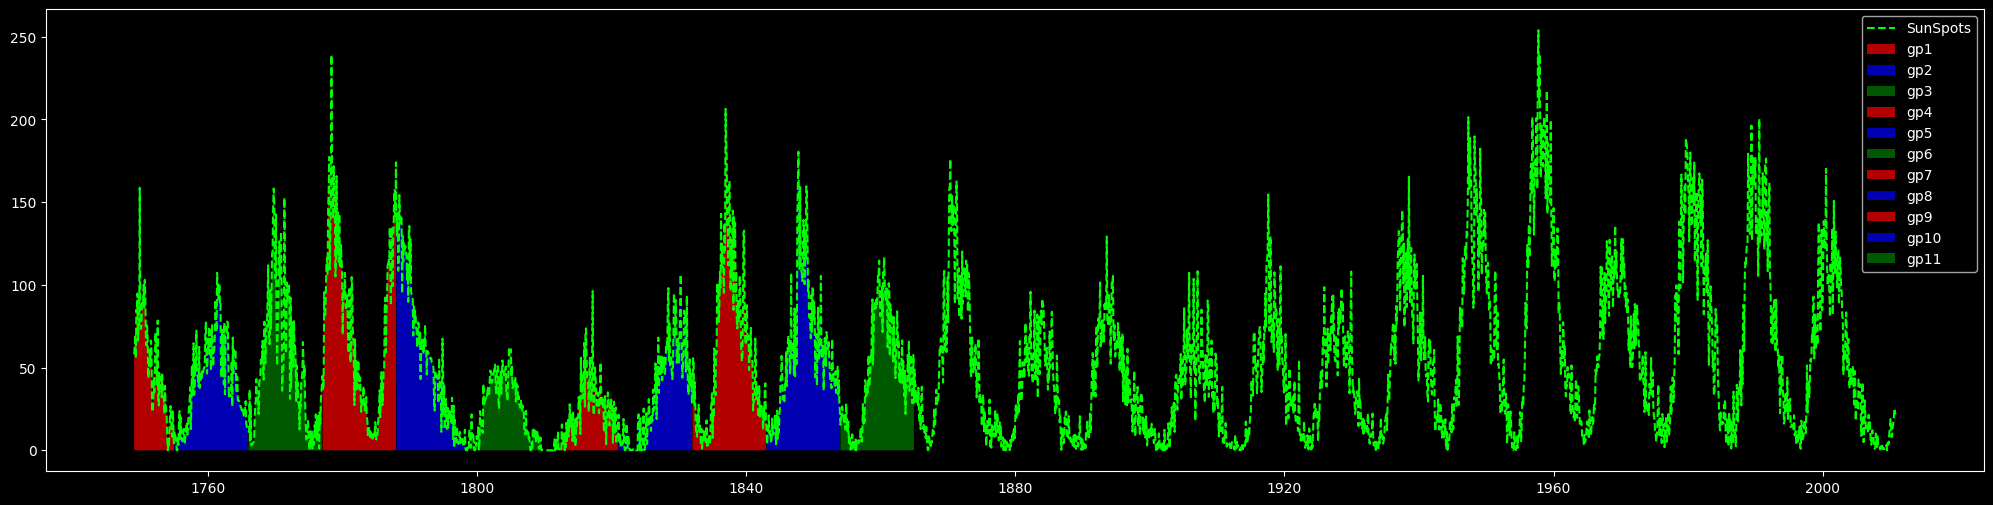

In [21]:
# ▶ 5년
df['gp'] = np.where((df['time_stamp'] >= '1749-01-01') & (df['time_stamp'] <= '1754-12-31'), 1, 0)

# ▶ 10년 주기
df['gp'] = np.where((df['time_stamp'] >= '1755-01-01') & (df['time_stamp'] <= '1765-12-31'), 2, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1766-01-01') & (df['time_stamp'] <= '1776-12-31'), 3, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1777-01-01') & (df['time_stamp'] <= '1787-12-31'), 4, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1788-01-01') & (df['time_stamp'] <= '1798-12-31'), 5, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1799-01-01') & (df['time_stamp'] <= '1809-12-31'), 6, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1810-01-01') & (df['time_stamp'] <= '1820-12-31'), 7, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1821-01-01') & (df['time_stamp'] <= '1831-12-31'), 8, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1832-01-01') & (df['time_stamp'] <= '1842-12-31'), 9, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1843-01-01') & (df['time_stamp'] <= '1853-12-31'), 10, df['gp'])
df['gp'] = np.where((df['time_stamp'] >= '1854-01-01') & (df['time_stamp'] <= '1864-12-31'), 11, df['gp'])

plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='--', color='lime')
plt.fill_between(df[df['gp']== 1]['time_stamp'], df[df['gp']== 1]['SunSpots'], facecolor='r',alpha=0.7,label='gp1');
plt.fill_between(df[df['gp']== 2]['time_stamp'], df[df['gp']== 2]['SunSpots'], facecolor='b',alpha=0.7,label='gp2');
plt.fill_between(df[df['gp']== 3]['time_stamp'], df[df['gp']== 3]['SunSpots'], facecolor='g',alpha=0.7,label='gp3');
plt.fill_between(df[df['gp']== 4]['time_stamp'], df[df['gp']== 4]['SunSpots'], facecolor='r',alpha=0.7,label='gp4');
plt.fill_between(df[df['gp']== 5]['time_stamp'], df[df['gp']== 5]['SunSpots'], facecolor='b',alpha=0.7,label='gp5');
plt.fill_between(df[df['gp']== 6]['time_stamp'], df[df['gp']== 6]['SunSpots'], facecolor='g',alpha=0.7,label='gp6');
plt.fill_between(df[df['gp']== 7]['time_stamp'], df[df['gp']== 7]['SunSpots'], facecolor='r',alpha=0.7,label='gp7');
plt.fill_between(df[df['gp']== 8]['time_stamp'], df[df['gp']== 8]['SunSpots'], facecolor='b',alpha=0.7,label='gp8');
plt.fill_between(df[df['gp']== 9]['time_stamp'], df[df['gp']== 9]['SunSpots'], facecolor='r',alpha=0.7,label='gp9');
plt.fill_between(df[df['gp']== 10]['time_stamp'], df[df['gp']== 10]['SunSpots'], facecolor='b',alpha=0.7,label='gp10');
plt.fill_between(df[df['gp']== 11]['time_stamp'], df[df['gp']== 11]['SunSpots'], facecolor='g',alpha=0.7,label='gp11');

plt.legend();
plt.gcf().set_size_inches(25, 6)

꼭 10년 주기는 아닌듯

### · 주기(Cycle 확인) - 연도
---

In [22]:
df.head()

,time_stamp,SunSpots,gp
0,1749-01-01,58.0,1
1,1749-02-01,62.6,1
2,1749-03-01,70.0,1
3,1749-04-01,55.7,1
4,1749-05-01,85.0,1


In [23]:
# ▶ dt.year / dt.month 파생 변수 생성
df['year'] = df['time_stamp'].dt.year
df['month'] = df['time_stamp'].dt.month
df.head()

,time_stamp,SunSpots,gp,year,month
0,1749-01-01,58.0,1,1749,1
1,1749-02-01,62.6,1,1749,2
2,1749-03-01,70.0,1,1749,3
3,1749-04-01,55.7,1,1749,4
4,1749-05-01,85.0,1,1749,5


In [24]:
# ▶ 연도별 평균 흑점 개수 비교
df_des = pd.DataFrame(df.groupby('year')['SunSpots'].describe())
df_des.head()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1749,12.0,80.925000,27.224692,55.7,65.375,75.70,85.050,158.6
1750,12.0,83.391667,12.668247,63.3,74.875,86.85,90.300,103.0
1751,12.0,47.658333,16.053743,23.2,39.750,48.00,60.025,70.0
1752,12.0,47.800000,16.296793,27.1,36.950,43.30,59.400,78.4
1753,12.0,30.675000,11.122469,6.7,24.250,31.85,38.250,45.7


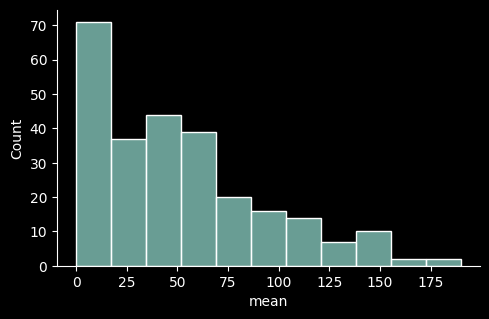

In [25]:
# ▶ 연도별 평균 흑점 개수 분포 비교
sns.displot(df_des['mean'])
plt.gcf().set_size_inches(5, 3)

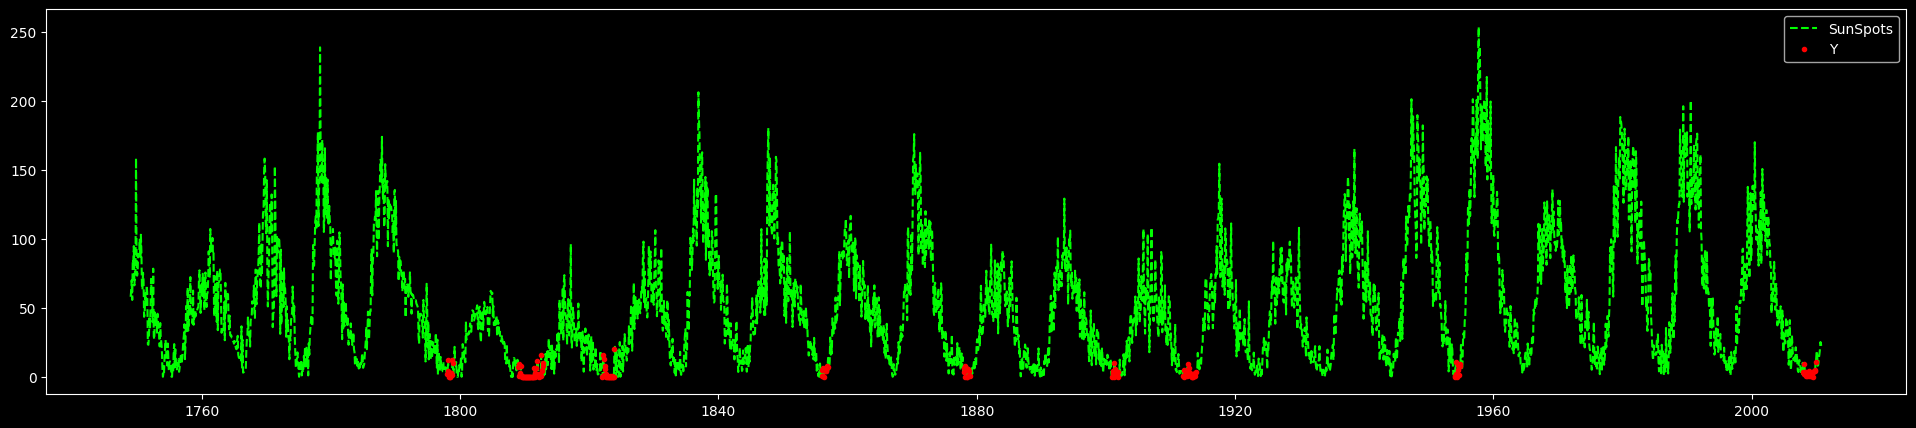

In [26]:
# ▶ 평균 높은 연도 그래프
# df['year'].isin('1978') → X
# df['year'].isin(['1978']) → O

plt.figure(figsize=(24,5))
plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='--', color='lime')
plt.plot(df[df['year'].isin(list(df_des[df_des['mean']<5].index))]['time_stamp'], df[df['year'].isin(list(df_des[df_des['mean']<5].index))]['SunSpots'], 'o', color='red', markersize=3, label='Y');
plt.legend();

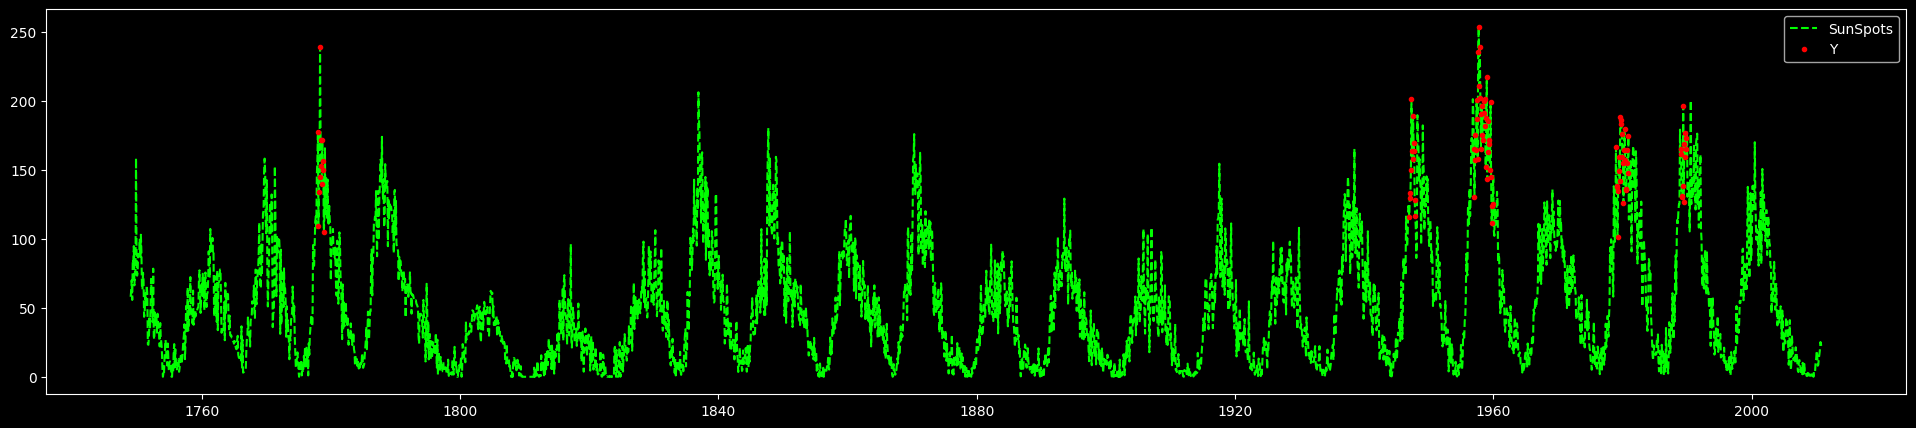

In [27]:
plt.figure(figsize=(24,5))
plt.plot(df['time_stamp'], df['SunSpots'], label='SunSpots', linestyle='--', color='lime')
plt.plot(df[df['year'].isin(list(df_des[df_des['mean']>150].index))]['time_stamp'], df[df['year'].isin(list(df_des[df_des['mean']>150].index))]['SunSpots'], 'o', color='red', markersize=3, label='Y');
plt.legend();

### · RRCF modeling
##### Robust Random Cut Forest
* 트리 기반 이상탐지 모델링
* 시간에 따라 다른 분포의 데이터에 대응한 트리 모델

---

In [40]:
df.head()

,time_stamp,SunSpots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [41]:
df.set_index('time_stamp', inplace=True)
df.head()

,SunSpots
time_stamp,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [42]:
# ▶ (1) Batch Detection

import numpy as np
import pandas as pd
import rrcf

# ▶ Set parameters

X = df
np.random.seed(0)
n = X.shape[0]
X = X.values # 중요 point
num_trees = 100
tree_size = 256

# ▶ Construct forest
forest = []
while len(forest) < num_trees:
    # ▶ Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size),
                           replace=False)
    # ▶ Add sampled trees to forest
    trees = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

# ▶ Compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)
avg_codisp /= index

In [43]:
avg_codisp

0       6.472222
1       5.558537
2       3.398597
3       3.001743
4       3.510862
          ...   
3138    3.366892
3139    4.146242
3140    3.501909
3141    4.248412
3142    3.136019
Length: 3143, dtype: float64

In [44]:
# ▶ avg_codisp를 concat 하기 위해 reset_index 실행 
df = df.reset_index()
df.head()

,time_stamp,SunSpots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [45]:
# ▶ anomaly score 부여 
df['rrcf_a_score'] = avg_codisp
df.head()

,time_stamp,SunSpots,rrcf_a_score
0,1749-01-01,58.0,6.472222
1,1749-02-01,62.6,5.558537
2,1749-03-01,70.0,3.398597
3,1749-04-01,55.7,3.001743
4,1749-05-01,85.0,3.510862


/var/folders/37/brl3s2hn2rdfswx8sdr8xp000000gn/T/ipykernel_5034/3531564588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avg_codisp);


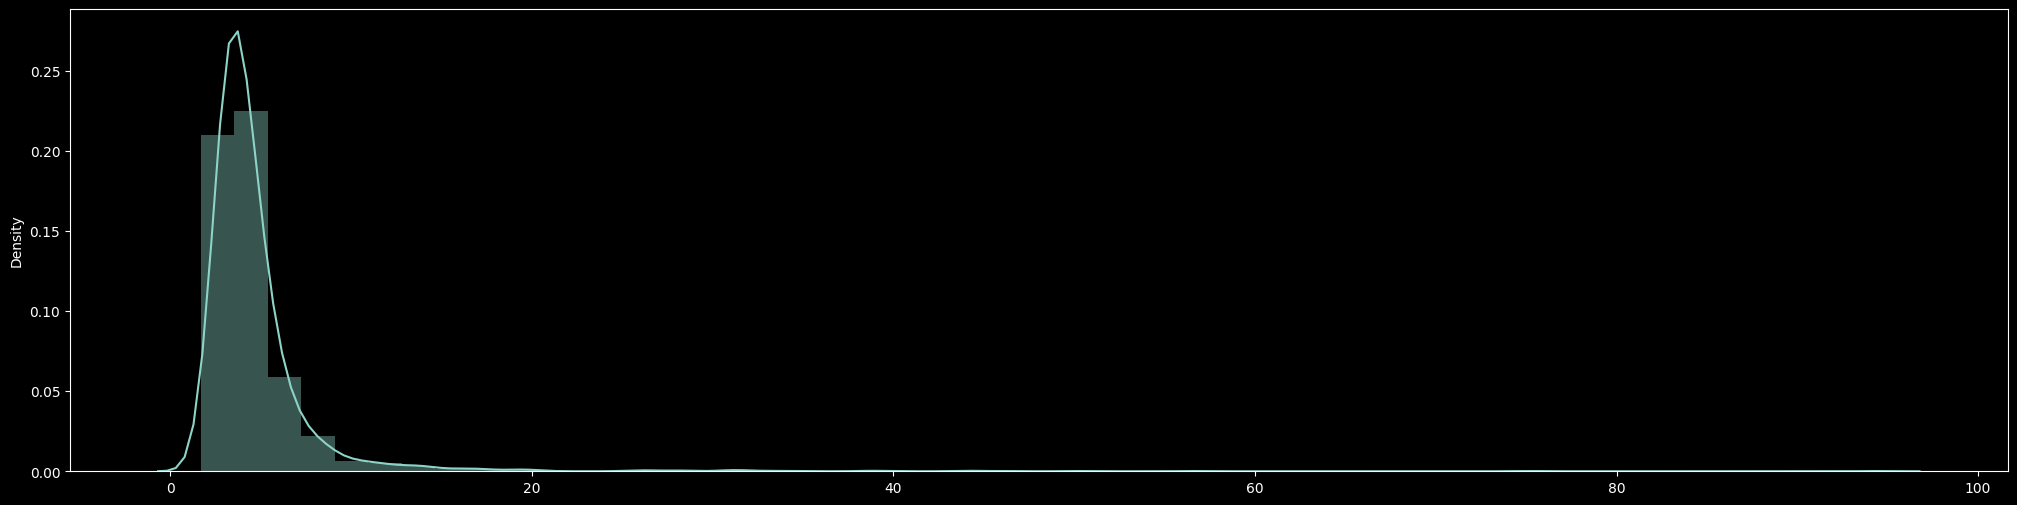

In [46]:
# ▶ Anomaly Score 분포 확인
sns.distplot(avg_codisp);
plt.gcf().set_size_inches(25, 6)

In [47]:
# ▶ thres 설정
df['rrcf_a_score'].quantile(0.90)

6.7334731205564555

### · Model 평가
---

In [48]:
df.head()

,time_stamp,SunSpots,rrcf_a_score
0,1749-01-01,58.0,6.472222
1,1749-02-01,62.6,5.558537
2,1749-03-01,70.0,3.398597
3,1749-04-01,55.7,3.001743
4,1749-05-01,85.0,3.510862


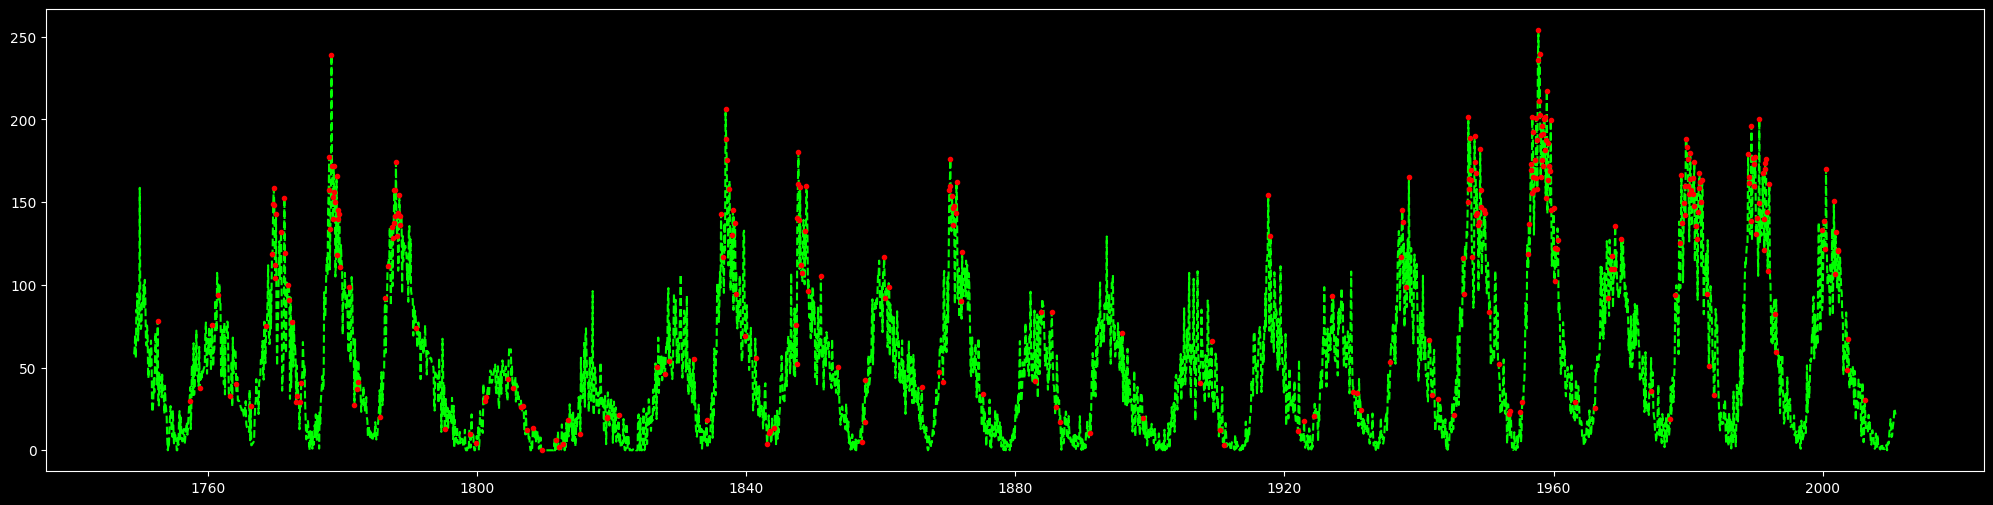

In [49]:
# ▶ thres 조절 필요 
plt.plot(df['time_stamp'], df['SunSpots'], linestyle='--', color='lime');
plt.plot(df[df['rrcf_a_score'] > df['rrcf_a_score'].quantile(0.90)]['time_stamp'], df[df['rrcf_a_score'] > df['rrcf_a_score'].quantile(0.90)]['SunSpots'], 'o', color='red', markersize=3);
plt.gcf().set_size_inches(25, 6)

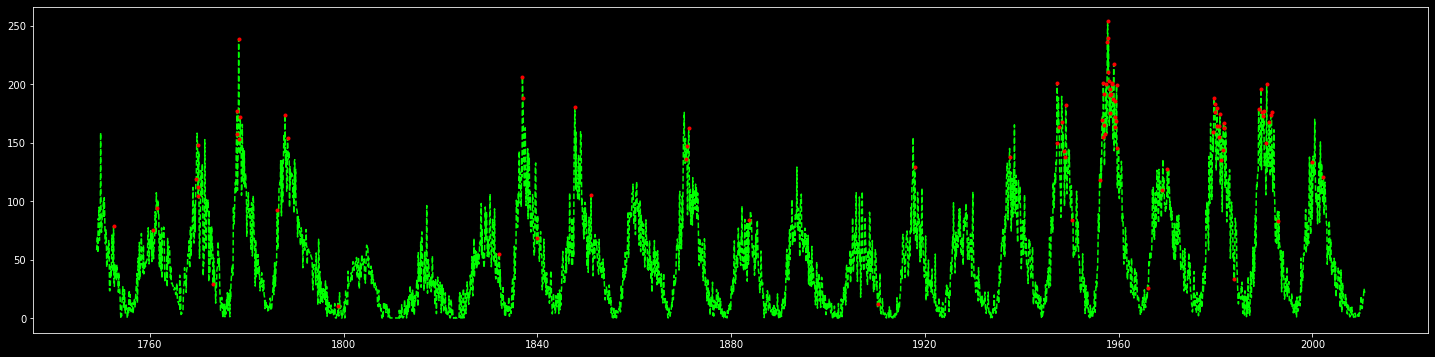

In [140]:
# ▶ thres 변수화 
thres = df['rrcf_a_score'].quantile(0.97)

plt.plot(df['time_stamp'], df['SunSpots'], linestyle='--', color='lime');
plt.plot(df[df['rrcf_a_score'] > thres]['time_stamp'], df[df['rrcf_a_score'] > thres]['SunSpots'], 'o', color='red', markersize=3);
plt.gcf().set_size_inches(25, 6)

Text(0.5, 1.0, 'log(CoDisp)')

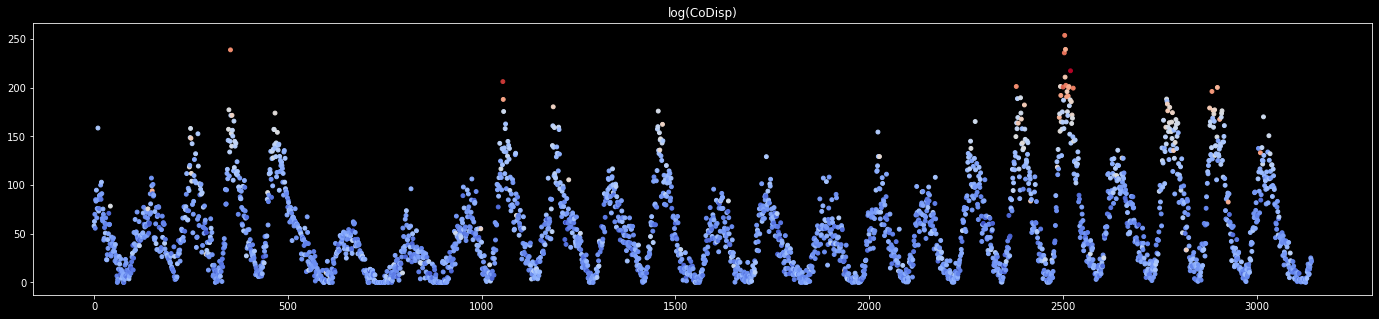

In [141]:
# ▶ scatter plot 활용 이상 탐지 
plt.figure(figsize=(24,5))
plt.scatter(df.index, df['SunSpots'],c=np.log(avg_codisp.sort_index().values),cmap='coolwarm', s=15)
plt.title('log(CoDisp)')